In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10 # 10 classes

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [7]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [8]:
# number of classes
K = len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [9]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [10]:
x_train[0].shape

(32, 32, 3)

In [11]:
# Build the model using the functional API

i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation="relu")(i)
# x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
# x = Conv2D(128, (3,3), strides=2, activation="relu")(x)

x = Conv2D(32, (3,3), activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)

# x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
model = Model(i, x)

In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 31s 14ms/step - loss: 1.3008 - accuracy: 0.5530 - val_loss: 1.8293 - val_accuracy: 0.4850
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9107 - accuracy: 0.6835 - val_loss: 0.9359 - val_accuracy: 0.6734
Epoch 3/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7646 - accuracy: 0.7355 - val_loss: 0.9029 - val_accuracy: 0.6952
Epoch 4/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6501 - accuracy: 0.7742 - val_loss: 1.0866 - val_accuracy: 0.6359
Epoch 5/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5608 - accuracy: 0.8091 - val_loss: 0.7765 - val_accuracy: 0.7600
Epoch 6/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.4788 - accuracy: 0.8343 - val_loss: 0.9297 - val_accuracy: 0.7108
Epoch 7/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.4045 - accuracy: 0.8598 - val_loss: 0.8064 -

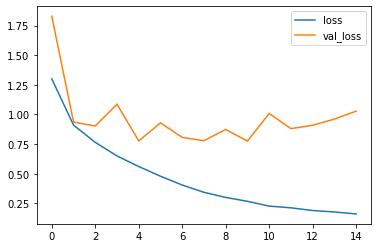

In [14]:
# Plot loss per iteration

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

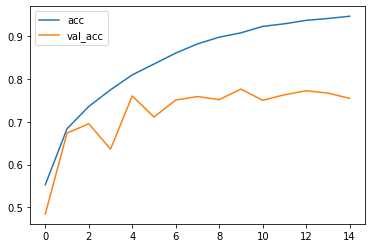

In [15]:
# Plot accuracy per iteration

plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
cm

array([[839,  16,  21,  21,   3,   7,   3,  22,  46,  22],
       [ 14, 904,   4,  12,   1,   4,   1,   4,  10,  46],
       [ 91,   5, 647,  75,  53,  48,  10,  64,   5,   2],
       [ 35,   7,  47, 635,  20, 161,  14,  60,   8,  13],
       [ 45,   4,  68,  74, 614,  44,  21, 118,   8,   4],
       [ 16,   3,  28, 157,  17, 694,   7,  70,   3,   5],
       [ 16,  16,  59, 119,  26,  64, 659,  19,  16,   6],
       [  8,   4,  20,  28,  18,  28,   2, 885,   1,   6],
       [ 81,  31,  13,  11,   1,   6,   1,   7, 840,   9],
       [ 43,  75,   5,  17,   1,   3,   2,  14,  14, 826]])

In [17]:
# label mapping

labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split("\n")
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

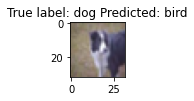

In [19]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

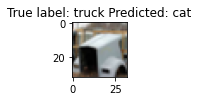

In [20]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

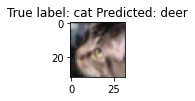

In [21]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

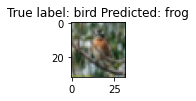

In [22]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

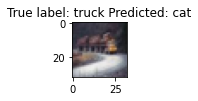

In [23]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

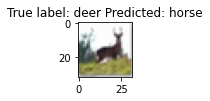

In [24]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

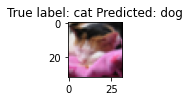

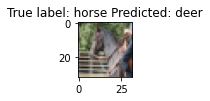

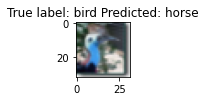

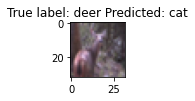

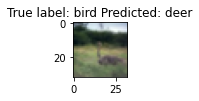

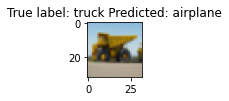

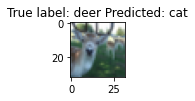

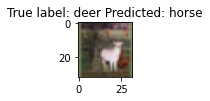

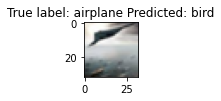

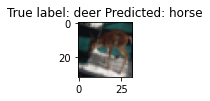

In [25]:
for i in range(10):
  misclassified_idx = np.where(p_test != y_test)[0]
  i = np.random.choice(misclassified_idx)
  plt.figure(figsize=(1,1))
  plt.imshow(x_test[i], cmap="gray")
  plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
  plt.show()
  print("="*70)

In [26]:
# fit with data augmentation

batch_size=32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range=0.1,
                                                                 horizontal_flip=True)
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.7878 - accuracy: 0.7425 - val_loss: 0.7350 - val_accuracy: 0.7635
Epoch 2/50
1562/1562 [==============================] - 43s 28ms/step - loss: 0.6635 - accuracy: 0.7768 - val_loss: 0.6874 - val_accuracy: 0.7769
Epoch 3/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.6129 - accuracy: 0.7921 - val_loss: 0.5826 - val_accuracy: 0.8027
Epoch 4/50
1562/1562 [==============================] - 43s 28ms/step - loss: 0.5797 - accuracy: 0.8024 - val_loss: 0.6052 - val_accuracy: 0.7968
Epoch 5/50
1562/1562 [==============================] - 43s 27ms/step - loss: 0.5584 - accuracy: 0.8088 - val_loss: 0.6001 - val_accuracy: 0.7962
Epoch 6/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.5399 - accuracy: 0.8152 - val_loss: 0.6444 - val_accuracy: 0.7895
Epoch 7/50
1562/1562 [==============================] - 44s 28ms/step - loss: 0.5235 - accuracy: 0.8192 - val_loss: 0.6444 -

**Observation:**

We are getting a lower training accuracy but a higher validation accuracy. Hnece there is lesser Overfitting. Therefore, the model has improved.

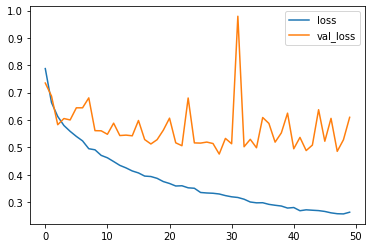

In [27]:
# Plot loss per iteration

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

**Observation:**

A much better learning curve than before.

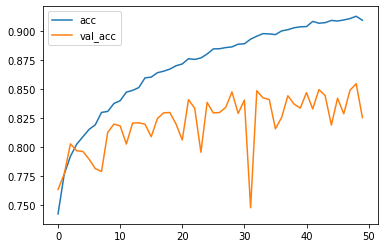

In [28]:
# Plot accuracy per iteration

plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
cm

array([[893,  15,  32,  12,   5,   3,   4,   2,  25,   9],
       [  4, 964,   5,   8,   0,   2,   2,   0,   0,  15],
       [ 39,   5, 809,  38,  26,  27,  40,  10,   3,   3],
       [ 25,   9,  86, 657,  43,  81,  72,  13,   6,   8],
       [ 28,   2,  81,  34, 741,  10,  66,  34,   4,   0],
       [ 24,  10,  40, 103,  30, 741,  26,  22,   3,   1],
       [  7,   1,  33,  35,  12,  10, 898,   0,   3,   1],
       [ 15,   1,  28,  27,  19,  20,   7, 874,   3,   6],
       [ 45,  27,  18,  11,   4,   1,   4,   3, 877,  10],
       [ 31, 129,   8,   5,   2,   1,   5,   8,  12, 799]])

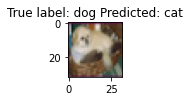

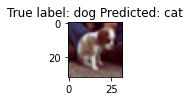

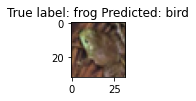

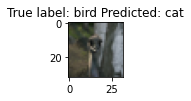

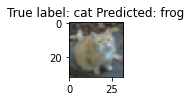

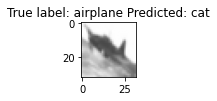

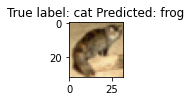

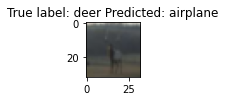

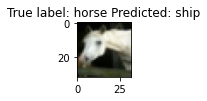

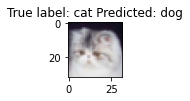

In [30]:
for i in range(10):
  misclassified_idx = np.where(p_test != y_test)[0]
  i = np.random.choice(misclassified_idx)
  plt.figure(figsize=(1,1))
  plt.imshow(x_test[i], cmap="gray")
  plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
  plt.show()
  print("="*70)

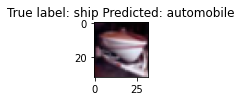

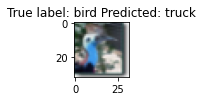

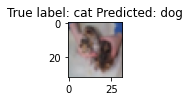

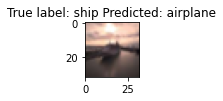

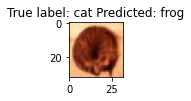

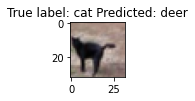

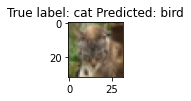

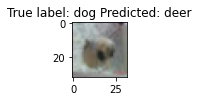

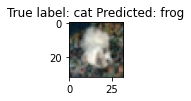

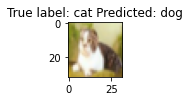

In [31]:
for i in range(10):
  misclassified_idx = np.where(p_test != y_test)[0]
  i = np.random.choice(misclassified_idx)
  plt.figure(figsize=(1,1))
  plt.imshow(x_test[i], cmap="gray")
  plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
  plt.show()
  print("="*70)

# Happy Learning